In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
car_data = pd.read_csv("data/CarPrices.csv")
print(car_data.shape)
print(car_data.dtypes.to_dict())


(205, 26)
{'car_ID': dtype('int64'), 'symboling': dtype('int64'), 'CarName': dtype('O'), 'fueltype': dtype('O'), 'aspiration': dtype('O'), 'doornumber': dtype('O'), 'carbody': dtype('O'), 'drivewheel': dtype('O'), 'enginelocation': dtype('O'), 'wheelbase': dtype('float64'), 'carlength': dtype('float64'), 'carwidth': dtype('float64'), 'carheight': dtype('float64'), 'curbweight': dtype('int64'), 'enginetype': dtype('O'), 'cylindernumber': dtype('O'), 'enginesize': dtype('int64'), 'fuelsystem': dtype('O'), 'boreratio': dtype('float64'), 'stroke': dtype('float64'), 'compressionratio': dtype('float64'), 'horsepower': dtype('int64'), 'peakrpm': dtype('int64'), 'citympg': dtype('int64'), 'highwaympg': dtype('int64'), 'price': dtype('float64')}


In [202]:
split = 200
selected_columns = ["horsepower", "citympg", "highwaympg"]

In [203]:
selected_data = car_data[selected_columns]
x_train = selected_data[:split].to_numpy()
x_test = selected_data[split:].to_numpy()

prices = car_data["price"]
y_train = prices[:split].to_numpy()
y_test = prices[split:].to_numpy()

In [204]:
def h(params, x):
    return np.inner(params, x)

def linear_regression(xs, ys, learning_rate = 1e-8, max_iter = 100):
    params = np.random.standard_normal(xs.shape[1])
    # params = np.zeros(xs.shape[1])
    for _ in range(max_iter):
        hs = np.array([h(params, x) for x in xs])
        errors = ys - hs
        change = (errors * xs.T).T
        change = np.sum(change, 0)
        params = params + learning_rate*change
    return params        
        


In [205]:
intercept_term = np.ones((x_train.shape[0], 1))
xs = np.hstack((intercept_term, x_train))
ys = y_train

params = linear_regression(xs, ys, 1e-8, 100)
print(params)

[  3.26624845 112.78070242  17.6368208   22.20798449]


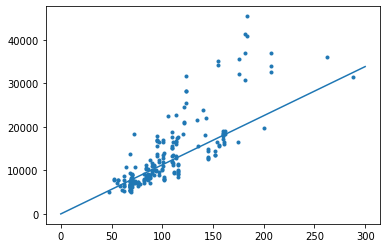

In [206]:
xs = car_data["horsepower"]
ys = car_data["price"]
plt.scatter(xs, ys, marker='.')

b = params[0]
a = params[1]
xs = np.linspace(0, 300, 2)
ys = xs*a + b
plt.plot(xs, ys)
